# Chater4. 
## 딥러닝을 소개합니다 
## :경사하강법

### 예측하고 비교하고 학습하라
3장에서 예측에 대해 학습하면서 신경망과 가중치에 대해 알아보았다.
그렇다면 학습하면서 발생했을 '가중치를 어떻게 설정하면 신경망이 정교해질까?'라는 의문에는
이번 장에서 비교와 학습을 다루면서 이에 대한 답을 찾아보자.

### 비교
#### 비교는 예측이 '벗어난 정도'를 측정합니다.
예측 후에 얼마나 잘 예측했는지를 평가하기 위한 오차(Error)를 측정하는 좋은 방법을 고안해내는 것이 가장 중요.

신경망의 '비교' 단계에서 오차를 측정할 때, 
1. 큰 실수는 과장하고 작은 실수는 무시한다
2. 오차는 늘 양수이다.

이번장에서는 오차를 측정할 때 평균제곱오차(Mean Squared Error)만 사용한다. 이는, 신경망의 정확도를 평가하는 여러 방법 중 하나이다.

비교 단계에서는 예측에서얼마나 벗어났는지를 판단할 수 있지만, 이것만으로는 학습할 수 없다. 친절하지 않고 그저 '크게 벗어남', '조금벗어남', '정확함' 같은 정도만 알려줄 뿐이다.

### 학습
#### 학습 단계에서 오차를 줄이기 위해 각 가중치를 어떻게 수정해야 할지를 알 수 있습니다.
학습은 오차 귀착(error attribution) 또는 오차가 생길 때 어떤 가중치가 관여했는지를 밝혀내는 과정이다.
여기서 경사하강법(gradient descent)이 이용된다.

경사하강법이 각 가중치에 대해 수행한 계산 결과가 오차를 줄이려면 가중치를 어떻게 조정해야 할지를 알려준다.
(경사하강법은 뒤에서 자세히 설명할 것.)

### 비교 : 여러분의 신경망은 예측을 잘하고 있습니까?
#### 오차를 측정해서 알아봅시다.
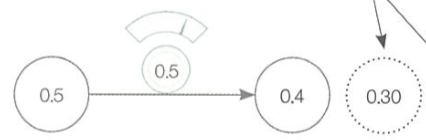

In [1]:
knob_weight = 0.5
input = 0.5
goal_pred = 0.8
pred = input * knob_weight
error = (pred - goal_pred) ** 2
print(error)

0.30250000000000005


#### 왜 제곱을 취한 오차를 사용하나요?
가장 핵심적인 이유는 출력값이 반드시 양수여야 하기 때문이다.
(pred - goal_pred)가 실제 오차와는 다르게 음수가 될 수도 있기 때문이다.
#### 큰 오차(>1)를 제곱하면 더 커지고 작은 오차(<1)를 제곱하면 더 작아지는 것 아닌가요?
이렇게 얻은 오차는 나중에 신경망이 학습할 때도 사용된다. 그러니 작은 오차는 놔두고 큰 오차에 집중하는 편이 좋다.



### 오차를 측정하는 이유

신경망을 학습시키는 목적은 정확한 예측 결과를 얻는 데에 있다.
신경망이 '정확한 goal_prediction 예측을 위해 error == 0이 되도록 knob_weight 변수를 수정하는 과정'을 거치기 위함이다. 

#### 오차 측정 방법에 따라 오차의 우선순위는 달라진다.
순오차(pure error)라고 불리는 pred - goal_pred를 수정해서 큰 오차는 아주 크게 만들고, 작은 오차는 순식간에 무의미해지게 만들 것이다.
이렇게 오차를 측정하면 큰 오차를 작은 오차보다 더 우선시할 수 있다.
하지만 반대로, 오차를 제곱하는 대신 절댓값을 취한다면 이런 유형의 우선순위를 얻을 수 없다.

#### 왜 양수인 오차만 사용하나요?
여러분은 앞으로 수백만 개의 input->goal_prediction 쌍을 다룰 것이다. 다루는 데이터의 크기가 달라져도 예측 결과는 정확해야 한다. 그러기 위해서는 평균 오차가 0이 되도록 노랙해야한다. 
예) 첫 번째 데이터의 오차 1000, 두 번째 데어터의 오차 -1000이면 평균오차는 0이 될 것이다.
따라서 이렇 문제를 예방하기 위해 양수만 사용하는 것. 예측 결과들을 상쇄하는 일이 일어나지 않게 하기 위함이다.

### 신경망 학습의 가장 간단한 형태는 어떤 걸까요?
#### 온냉 요법으로 학습하기
학습은 knob_weight를 위나 아래로 조정해서 오차를 줄이는 것으로 귀결된다. 이를 반복해서 오차가 0으로 수렴한다면 학습이 끝나는 것.

#### <온냉학습>
온냉학습이란, 가중치(weight)를 좌우로 흔들어서 가장 오차를 많이 줄이는 방향으로 가중치를 이동시키고, 오차가 0으로 수렴할 때까지 이 과정을 반복하는 것을 말한다.
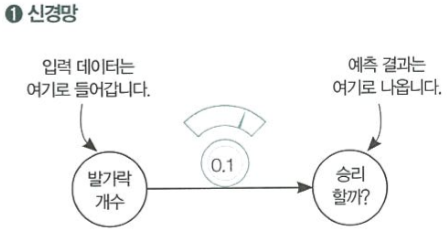

In [3]:
weight = 0.1
lr = 0.01
def neural_network(input, weight):
    prediction = input * weight
    return prediction

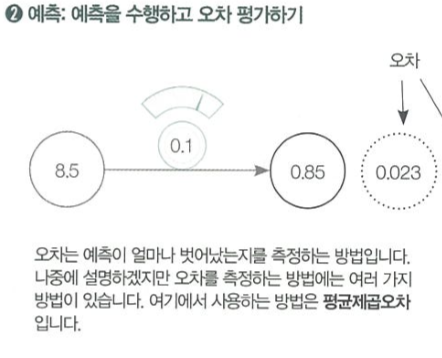

In [4]:
number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)
input = number_of_toes[0]
true = win_or_lose_binary[0]
pred = neural_network(input, weight)
error = (pred - true) ** 2
print(error)

0.022499999999999975


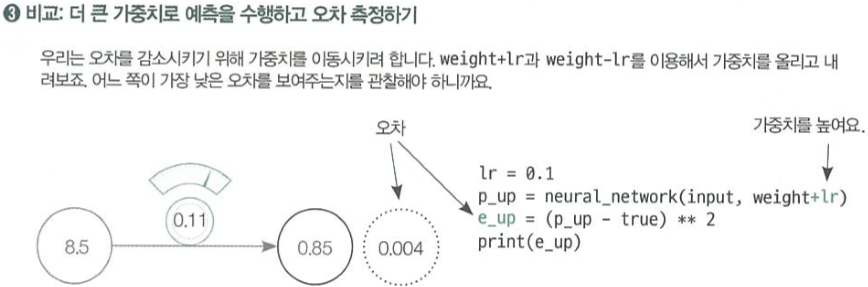

In [6]:
lr = 0.01
p_up = neural_network(input, weight+lr)
e_up = (p_up - true) ** 2
print(e_up)

0.004224999999999993




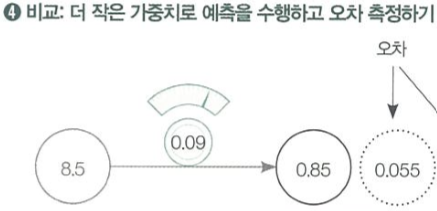

In [6]:
lr = 0.01
p_dn = neural_network(input, weight-lr)
e_dn = (p_dn - true) ** 2
print(e_dn)

0.05522499999999994


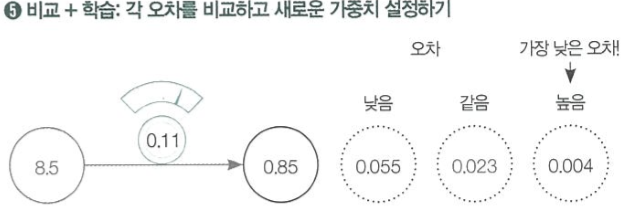

In [9]:
if(error > e_dn or error > e_up):
    if(e_dn < e_up):
        weight -= lr
    if(e_up < e_dn):
        weight += lr

위의 5단계가 온냉 학습의 1회분이다. 대개는 적절한 가중치를 찾기 위해 여러번 온냉 학습을 반복해야 한다.

### 온냉 학습
#### 온냉 학습은 어쩌면 가장 간단한 학습일지도 모릅니다.

In [11]:
weight = 0.5
input = 0.5
goal_prediction = 0.8

step_amount = 0.001

for iteration in range(1101):
    prediction = input * weight
    error = (prediction - goal_prediction) ** 2
    
    print("Error:" + str(error) + "Prediction:" + str(prediction))
    
    up_prediction = input * (weight + step_amount)
    up_error = (goal_prediction - up_prediction) ** 2
    
    down_prediction = input * (weight - step_amount)
    down_error = (goal_prediction - down_prediction) ** 2
    
    if(down_error < up_error):
        weight = weight - step_amount
    
    if(down_error > up_error):
        weight = weight + step_amount    

Error:0.30250000000000005Prediction:0.25
Error:0.3019502500000001Prediction:0.2505
Error:0.30140100000000003Prediction:0.251
Error:0.30085225Prediction:0.2515
Error:0.30030400000000007Prediction:0.252
Error:0.2997562500000001Prediction:0.2525
Error:0.29920900000000006Prediction:0.253
Error:0.29866224999999996Prediction:0.2535
Error:0.29811600000000005Prediction:0.254
Error:0.2975702500000001Prediction:0.2545
Error:0.29702500000000004Prediction:0.255
Error:0.29648025Prediction:0.2555
Error:0.29593600000000003Prediction:0.256
Error:0.2953922500000001Prediction:0.2565
Error:0.294849Prediction:0.257
Error:0.29430625Prediction:0.2575
Error:0.293764Prediction:0.258
Error:0.2932222500000001Prediction:0.2585
Error:0.292681Prediction:0.259
Error:0.29214025Prediction:0.2595
Error:0.2916Prediction:0.26
Error:0.2910602500000001Prediction:0.2605
Error:0.29052100000000003Prediction:0.261
Error:0.28998225Prediction:0.2615
Error:0.28944400000000003Prediction:0.262
Error:0.2889062500000001Prediction:0.

### 온냉 학습의 특징
#### 단순하다.
(+) 왜 정확히 1101번 반복하는 거죠?
앞쪽 예제의 신경망은 1101번 반복한 후에 0.8에 도달한다. 1101회 넘게 반복하면 신경망은 덜 예쁜 오차 로그를 출력하면서 예측 결과는 0.8 전후로 꿈틀거릴 것이다.

#### 문제점1 : 온냉 학습은 비효율적이다.
knob_weight 하나를 수정하려고 여러 차례 예측을 해야 한다. 확실히 비효율적이다.

#### 문제점2 : 가끔은 목표를 정확히 예측하지 못한다.
최적의 weight가 step_amount 설정과 n * step_amount만큼 떨어져 있지 않다면 신경망은 step_amount보다 작은 수만큼 지나치는 예측을 한다. 그러면 예측값은 goal_prediction의 앞뒤로 오가며 바뀐다.

#### 문제점3. weight를 이동시킬 정확한 정도를 모른다.
weight를 이동시킬 정확한 방향은 알아도 정확히 얼마나 옮겨야 하는지를 모른다는 점이 가장 문제이다. 
온냉 학습에서는 weight를 수정할 때마다 세 번의 예측을 수정해야 하는 데다 정확한 weight를 학습하지 못하도록 방해하는 임의적인 step_amount 덕분에 비효율적이다.

### 오차를 이용하여 이동 방향과 거리 계산하기
#### 오차를 측정해서 방향과 거리를 알아냅시다

In [14]:
weight = 0.5
goal_pred = 0.8
input = 0.5

for iteration in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    direction_and_amount = (pred - goal_pred) * input
    weight = weight - direction_and_amount
    
    print("Error:" + str(error) + "   " + "Prediction:" + str(pred))

Error:0.30250000000000005   Prediction:0.25
Error:0.17015625000000004   Prediction:0.3875
Error:0.095712890625   Prediction:0.49062500000000003
Error:0.05383850097656251   Prediction:0.56796875
Error:0.03028415679931642   Prediction:0.6259765625
Error:0.0170348381996155   Prediction:0.669482421875
Error:0.00958209648728372   Prediction:0.70211181640625
Error:0.005389929274097089   Prediction:0.7265838623046875
Error:0.0030318352166796153   Prediction:0.7449378967285156
Error:0.0017054073093822882   Prediction:0.7587034225463867
Error:0.0009592916115275371   Prediction:0.76902756690979
Error:0.0005396015314842384   Prediction:0.7767706751823426
Error:0.000303525861459885   Prediction:0.7825780063867569
Error:0.00017073329707118678   Prediction:0.7869335047900676
Error:9.603747960254256e-05   Prediction:0.7902001285925507
Error:5.402108227642978e-05   Prediction:0.7926500964444131
Error:3.038685878049206e-05   Prediction:0.7944875723333098
Error:1.7092608064027242e-05   Prediction:0.7958

이 방법은 경사하강법(gradient descent)이라고 알려진 뛰어난 학습 방법이다.
이 방법을 사용하면 error를 감소시키는 weight의 수정 방향과 거리를 모두 계산할 수 있다.
#### direction_and_amount가 뭔가요?
weight를 어떻게 수정해야 할지를 나타내는 것.
#### 순오차(pred-goal_pred)는 뭔가요?
가공하지 않은 벗어난 방향과 거리 데이터.
순오차가 아주 크거나 작으면, 예측이 정말 크게 벗어났다는 의미이다.
#### 스케일링(Scailing), 음의 반전(Negative Reversal), 종료(Stopping)는 뭔가요?
이 세가지가 서로 결합하여 순오차를 weight 갱신에 사용할 절댓값으로 바꾼다.
이것들을 처리해서 순오차가 weight를 제대로 갱신 할 수 있도록 한다.
#### 종료(Stopping)가 뭔가요?
입력을 곱함으로써 순오차에 가해지는 첫 번째(그리고 가장 단순한) 영향이다.
input이 0이면 direction_and_amount역시 0이 되도록 강제하는 식.
input이 0일 때는 학습할 것이 없다는 의미이므로 당연히 아무것도 학습(수정)하지 않는다.
모든 weight는 동일한 error를 가지며 pred가 늘 0이기 때문에 가중치를 수정한다고 해서 달라지는 것은 아무것도 없다.
#### 음의 반전(Negative Reversal)이 뭔가요?
input이 양수일 때, weight를 위로 옮기면 이에 따라 예측 결과도 상향한다.
input이 음수일 때, weight를 높이면 예측 결과는 도리어 아래로 내려간다.
따라서, input이 음의 값을 가질 때 순오차에 input을 곱하면 direction_and_amount의 부호가 뒤집히게 만들 수 있다.
#### 스케일링이 뭔가요?
논리적으로 input이 크면 weight 갱신치 또한 커야 한다. 스케일링은 통제할 수 없는 경우가 더 많기 때문에 부작용에 가깝다고 보는 편이 맞다.
차후에 이 현상을 다루기 위해 알파(alpha)라는 녀석을 사용할 것.